# QSAR Biodegradation - Fabien ALEXANDRINE

### On commence par importer le set de données et ajouter le nom de chaque colonne en suivant la description de la base

In [22]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv', sep = ';', 
                      names = ["SpMax_L", "J_Dz(e)", "nHM", "F01[N-N]", "F04[C-N]", "NssssC", "nCb-", "C%", "nCp", "nO", "F03[C-N]", "SdssC", "HyWi_B(m)",
                              "LOC", "SM6_L", "F03[C-O]", "Me", "Mi", "nN-N", "nArNO2", "nCRX3", "SpPosA_B(p)", "nCIR", "B01[C-Br]", "B03[C-Cl]",
                              "N-073", "SpMax_A", "Psi_i_1d", "B04[C-Br]", "SdO", "TI2_L", "nCrt", "C-026", "F02[C-N]", "nHDon", "SpMax_B(m)",
                              "Psi_i_A", "nN", "SM6_B(m)", "nArCOOR", "nX", "exp_class"])
    
for indice, col in enumerate(df.columns):
  print("{indice} : {col}".format(**locals()))

0 : SpMax_L
1 : J_Dz(e)
2 : nHM
3 : F01[N-N]
4 : F04[C-N]
5 : NssssC
6 : nCb-
7 : C%
8 : nCp
9 : nO
10 : F03[C-N]
11 : SdssC
12 : HyWi_B(m)
13 : LOC
14 : SM6_L
15 : F03[C-O]
16 : Me
17 : Mi
18 : nN-N
19 : nArNO2
20 : nCRX3
21 : SpPosA_B(p)
22 : nCIR
23 : B01[C-Br]
24 : B03[C-Cl]
25 : N-073
26 : SpMax_A
27 : Psi_i_1d
28 : B04[C-Br]
29 : SdO
30 : TI2_L
31 : nCrt
32 : C-026
33 : F02[C-N]
34 : nHDon
35 : SpMax_B(m)
36 : Psi_i_A
37 : nN
38 : SM6_B(m)
39 : nArCOOR
40 : nX
41 : exp_class


In [23]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,exp_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


### On vérifie si des colonnes sont nulles afin de ne pas les utiliser plus tard mais toutes les cases ont une valeur. Il y a 1055 rows.

In [24]:
df.isnull().sum()

SpMax_L        0
J_Dz(e)        0
nHM            0
F01[N-N]       0
F04[C-N]       0
NssssC         0
nCb-           0
C%             0
nCp            0
nO             0
F03[C-N]       0
SdssC          0
HyWi_B(m)      0
LOC            0
SM6_L          0
F03[C-O]       0
Me             0
Mi             0
nN-N           0
nArNO2         0
nCRX3          0
SpPosA_B(p)    0
nCIR           0
B01[C-Br]      0
B03[C-Cl]      0
N-073          0
SpMax_A        0
Psi_i_1d       0
B04[C-Br]      0
SdO            0
TI2_L          0
nCrt           0
C-026          0
F02[C-N]       0
nHDon          0
SpMax_B(m)     0
Psi_i_A        0
nN             0
SM6_B(m)       0
nArCOOR        0
nX             0
exp_class      0
dtype: int64

### Scatter plot du pourcentage d'atomes de carbone par rapport au nombre d'atomes lourds dans les produits chimiques étudiés. On ne remarque pas de corrélation particulière

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


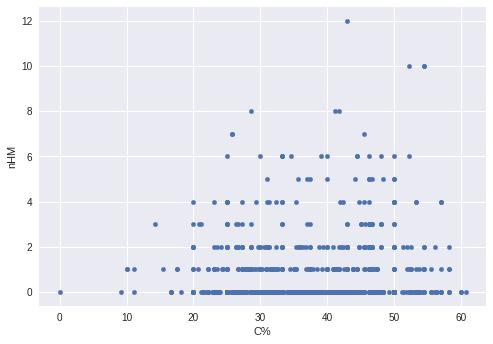

In [25]:
df.plot.scatter(x="C%", y="nHM")

### Nombre d'atomes d'oxygène moyen en fonction de biodégradable ou non biodégradable. On remarque que les produits biodégradables possèdent en moyenne davantage d'atomes d'oxygène

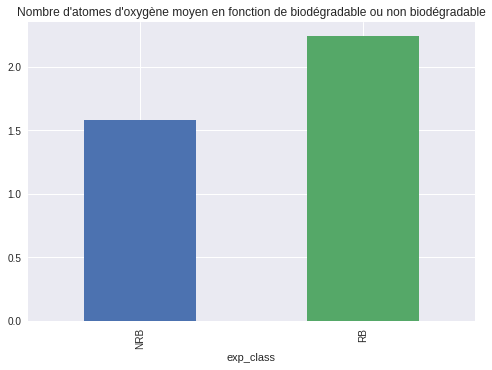

In [26]:
title    = "Nombre d'atomes d'oxygène moyen en fonction de biodégradable ou non biodégradable"
to_plot  = df.groupby("exp_class")["nO"].mean()
ax       = to_plot.plot.bar(title=title)

### Frequence de C-N de distance topologique 3 en fonction de biodégradable ou non biodégradable. Cette fréquence de relations Carbone-Azote de distance topologique 3 semble être un fort indicateur de la classe à déterminer

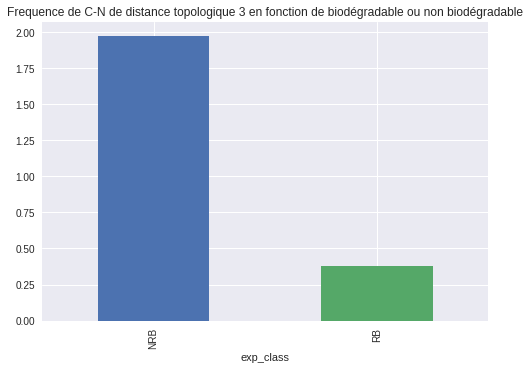

In [6]:
title    = "Frequence de C-N de distance topologique 3 en fonction de biodégradable ou non biodégradable"
to_plot  = df.groupby("exp_class")["F03[C-N]"].mean()
ax       = to_plot.plot.bar(title=title)

### Afin de faciliter la classification, on crée une nouvelle colonne 'class' qui possède 1 si 'exp_class' = 'RB' et 0 si 'exp_class' = 'NRB'

In [0]:
from __future__ import print_function

from sklearn import datasets, svm
import numpy as np

In [29]:
df['class'] = np.where(df['exp_class']=='RB', 1, 0)
df[df.columns[0:41]]

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,0,1,3.046,5.000,0,6.690,0,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,0,3.351,2.405,0,8.003,0,0
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,0,3.351,2.556,0,7.904,0,0
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,...,0,0,0,1,4.712,4.583,0,9.303,0,0
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,...,0,0,0,0,3.379,2.143,0,7.950,0,0
8,4.596,3.0777,0,0,0,0,2,44.4,2,0,...,0,0,0,0,3.626,1.917,0,7.939,0,0
9,5.040,3.6112,0,0,1,0,2,41.2,0,4,...,0,1,2,1,3.888,3.500,1,8.706,0,0


### La colonne 'class' à prédire et le reste du set sont séparés en X et y.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df[df.columns[0:41]]
y = df["class"]

### On cherche les feature importances. On remarque notamment que la variable F03[C-O] a une p-value de 0, elle est donc bien pertinente

In [31]:
import statsmodels.api as sm

intercept_x = sm.add_constant(X)
estimateur  = sm.OLS(y, intercept_x)
modele      = estimateur.fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     24.30
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          3.88e-122
Time:                        13:06:15   Log-Likelihood:                -345.48
No. Observations:                1055   AIC:                             775.0
Df Residuals:                    1013   BIC:                             983.3
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.2367      2.181      3.776      

### On retire de X les colonnes les moins pertinentes

In [32]:

columns = ['nHDon', 'TI2_L', 'nCRX3']
X.drop(columns, axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Le set de données est split en train et test

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Afin de trouver les meilleurs hyperparamètres on effectue une random search

In [34]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [35]:
# Base model
rf = RandomForestRegressor()
# Random search with 3 fold cross validation 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

### Les meilleurs paramètres du random forest

In [36]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}

### Accuracy du model de base

In [0]:
def funct(x):
    x = x[x!=0]
    # do something here
    return x
  
def evaluate(model, test_features, test_labels):
  
  predictions = model.predict(test_features)
  predictions = np.rint(predictions)
  predictions

  error = predictions - test_labels

  error = funct(error)
  f = error.count()
  acc = 100 - (f / test_labels.count() * 100)
  return acc

In [38]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
base_accuracy

86.74242424242425

### On fait une grid search pour tenter d'optimiser les résultats

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [40,50,60,70],
    'max_features': [2,3],
    'min_samples_leaf': [1,2],
    'min_samples_split': [9, 10, 11],
    'n_estimators': [1200, 1400, 1600, 2000]
}
# Create base model
rf = RandomForestRegressor()
# Instantiate grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [40]:
# Fit
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 12.7min finished


{'bootstrap': False,
 'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 2000}

### Accuracy de la grid search

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 1400}


In [42]:
best_grid = grid_search.best_estimator_

accuracy = evaluate(best_grid, x_test, y_test)
print("Accuracy : " + str(accuracy) + "%")

Accuracy : 90.15151515151516%


### Courbe ROC du model de base et du model grid search

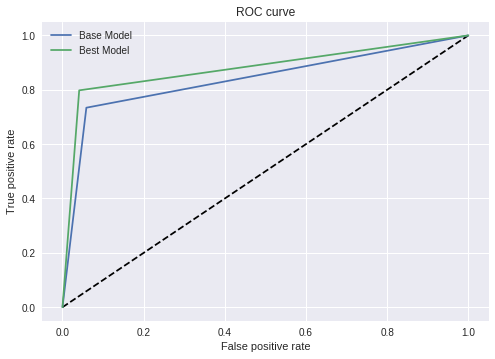

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

predictions_base = base_model.predict(x_test)
predictions_base = np.rint(predictions_base)

predictions_best = best_grid.predict(x_test)
predictions_best = np.rint(predictions_best)

fpr_base, tpr_base, _ = roc_curve(y_test, predictions_base)
fpr_best, tpr_best, _ = roc_curve(y_test, predictions_best)
  
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_base, tpr_base, label='Base Model')
plt.plot(fpr_best, tpr_best, label='Best Model')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()